In [1]:
from numpy import sqrt, pi, exp, linspace, loadtxt
import matplotlib.pyplot as plt
from lmfit.models import LinearModel, PolynomialModel
import numpy as np
import matplotlib
import pandas as pd

matplotlib.rcParams['legend.handlelength'] = 1
matplotlib.rcParams['legend.numpoints'] = 1

In [7]:
df = pd.read_csv("./Data/Compton_data.csv", header = None)

df.columns = ["x", "y"]

df.head()

,x,y
0,0.048943,0.000242
1,0.060307,0.000235
2,0.093692,0.000263
3,0.133975,0.000346
4,0.233956,0.000715


In [41]:
mod1 = LinearModel(prefix='p1_')

pars1 = mod1.guess(df["y"], x=df["x"])

result1 = mod1.fit(df["y"], pars1, x=df["x"], weights = 1. / (df["y"] * 0.099536))

print(result1.fit_report())

[[Model]]
    Model(linear, prefix='p1_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 13
    # variables        = 2
    chi-square         = 11.0001611
    reduced chi-square = 1.00001465
    Akaike info crit   = 1.82848733
    Bayesian info crit = 2.95838605
    R-squared          = -705851.784
[[Variables]]
    p1_slope:      0.00229580 +/- 9.3074e-05 (4.05%) (init = 0.002211904)
    p1_intercept:  9.1131e-05 +/- 1.5901e-05 (17.45%) (init = 0.0001443809)
[[Correlations]] (unreported correlations are < 0.100)
    C(p1_slope, p1_intercept) = -0.6117


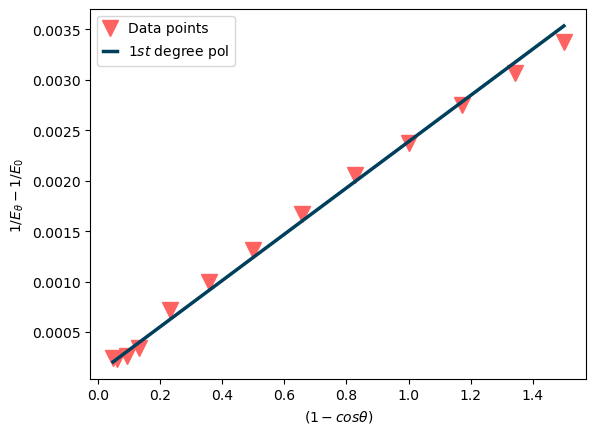

In [42]:
plt.plot(x, y, "v", color='#ff6361', markersize=12)
plt.plot(x, result1.best_fit, '#003f5c', linewidth=2.5)

plt.ylabel(r'$1/E_{\theta} - 1/E_{0}$')
plt.xlabel(r'$(1-cos{\theta}$)')

plt.legend(('Data points','$1st$ degree pol'),loc='best')

plt.show()